# I wish I knew about contango before buying an oil ETF

In the first half of 2020, the energy market underwent two simultaneous demand and supply shocks: 
* demand: the spread of a new corona virus forced governments to quarantine people and froze oil consumption. 
* supply: Russia and Saoudi Arabia flooded the market in order to put US shale producers out of business. 

Being a contrarian investor, I thought 20-30\\$ a barrel was a once-in-a decade buying opportunity because:
* Oil producers cannot maintain social peace. 
* No one can invest in renewables. 
* Markets are short-sighted, and the constant risk of conflict in the middle-east is not priced in. 

And after all, a barrel costed 30\\$ in 2003 and skyrocketted to 150\\$ in 2008. It felt like déjà vu. 
So, I jumped in and bought the WisdomTree WTI Crude ETF.
Before buying, I should have compared the return of the ETF with the commodity itself (graph below):

In [85]:
import quandl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from authtoken import authtoken
import yfinance as yf
import pandas_datareader as pdr

In [86]:
def compare_from(df,date):
    res = df.loc[df.index>date]
    scale = res.fillna(method='bfill',inplace=False).iloc[0]
    res = res/scale
    return res

In [87]:
prices = pd.DataFrame({'oil spot': quandl.get("FRED/DCOILWTICO", authtoken=authtoken)['Value'],
                      'oil ETF': yf.Ticker('CRUD.MI').history(period="max")['Close']})
prices = prices.loc[prices['oil spot']!=0]

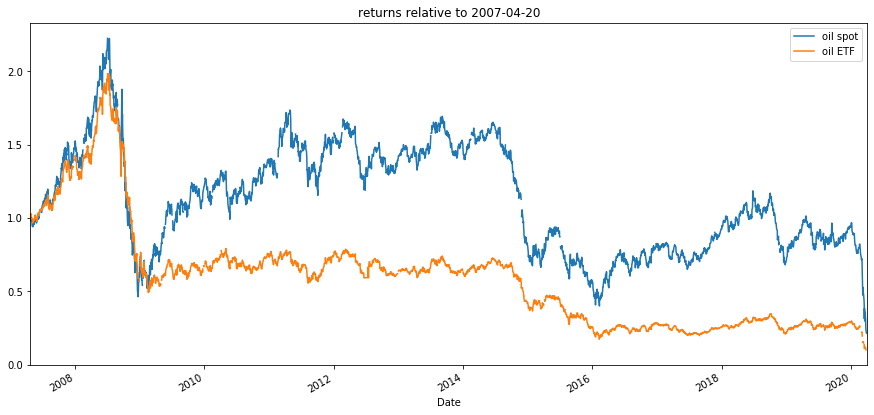

In [89]:
a = compare_from(prices,'2007-04-20')
a.plot(figsize=(15,7))
plt.title("returns relative to 2007-04-20")
plt.savefig("oil_spot_etf.jpg")

The graph shows how poorly the ETF tracked spot prices over years. The divergence is most striking in the period from 2009 to 2015: whereas spot prices were multiplied by 3, the ETF remained stagnant. 

The reason for the divergence was clearly explained in the ETF [fact sheet](https://www.wisdomtree.eu/en-gb/-/media/eu-media-files/key-documents/factsheet/etf-securities/factsheet---wisdomtree-wti-crude-oil.pdf) (citation below):
> WisdomTree WTI Crude Oil is designed to enable investors to gain an exposure to a total return investment in crude oil by tracking the Bloomberg Crude Oil Subindex. The Index is designed to reflect the movement in the price of the WTI crude oil **futures** contracts (that are continuously rolled on a pre-determined rolling schedule) used in the Bloomberg Commodity Index. A futures contract is an agreement to purchase a commodity at an agreed price, with delivery and payment to take place at a specified point in the future. Futures contracts are generally disposed of just before the term of the contract expires and new contracts entered into in order to avoid taking actual delivery of the commodity in question (a process known as '**rolling**'), so that continuous exposure to the commodity is maintained. The contracts being purchased may be more expensive than the contracts being sold which would cause an investor in commodity futures to make an additional loss. This market trend is known as '**contango**'. Alternatively the contracts being purchased may be cheaper than the ones being sold which would result in an additional gain, known as 'backwardation'.  This price difference is commonly referred to as "roll yield". As the roll yield is incorporated into the calculation of the value of the Index, it may therefore  have a positive or negative impact on the value of the Index depending on whether there is contango or backwardation. The ETC will also be affected as its value is based upon the value of the Index.

In layman terms, what does it mean ? 
* The ETF does not hold oil physically. Rather, the ETF holds future contracts, i.e. contracts for delivery of oil in the future. As the ETC does not seek delivery but continuous exposure to oil prices, contracts are "rolled" on a monthly frequency: the contract for the current month is sold, and a contract for the next month is bought. 
* When prices are in contango (i.e. prices for next month are higher than for now), rolling contracts costs money and eats up the investment returns. 

****Conclusion****

For a long-term investor, direct or indirect exposure to commodities through future contracts may not be a good idea.  
A contango price structure will create a negative rolling yield that eats up investment returns. 
Fortunately, I became aware of this before suffering from the effect of contango. 
In the future, I will look for an alternative strategy to go long on energy commodities. 